In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df_train = pd.read_csv('E:/Analyticsvidhya/train.csv')

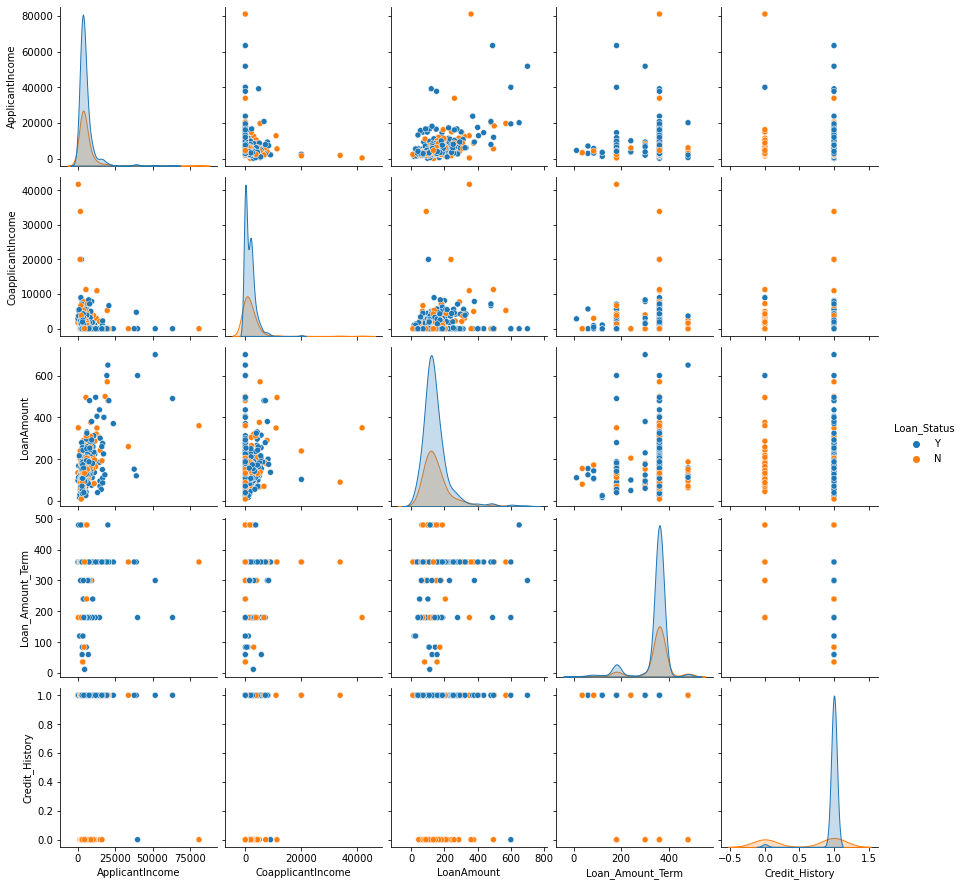

In [3]:
sns.pairplot(df_train,hue='Loan_Status')

In [4]:
from pandas_profiling import ProfileReport
pf = ProfileReport(df_train)
pf.to_widgets()

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\Suyog\anaconda3\lib\site-packages\pandas_profiling\visualisation\plot.py:166: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [4]:
df_train.drop('Loan_ID',inplace=True,axis=1)

In [5]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df_train = df_train.fillna(df_train.mode().iloc[0])

In [7]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
df_train['Gender']= label_encoder.fit_transform(df_train['Gender'])
df_train['Married']= label_encoder.fit_transform(df_train['Married'])
df_train['Education']= label_encoder.fit_transform(df_train['Education'])
df_train['Credit_History']= label_encoder.fit_transform(df_train['Credit_History'])
df_train['Property_Area']= label_encoder.fit_transform(df_train['Property_Area'])
df_train['Loan_Status']= label_encoder.fit_transform(df_train['Loan_Status'])
df_train['Self_Employed']= label_encoder.fit_transform(df_train['Self_Employed'])
df_train['Dependents']=label_encoder.fit_transform(df_train['Dependents'])


In [8]:
df_train.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,120.0,360.0,1,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1,2,1


In [9]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = trans.fit_transform(df_train)

In [10]:
dataset = pd.DataFrame(data)

In [11]:
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.160637,0.74359,1.0,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [12]:
dataset.columns = df_train.columns

In [13]:
dataset.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.000000,0.0,0.0,0.070489,0.000000,0.160637,0.74359,1.0,1.0,1.0
1,1.0,1.0,0.333333,0.0,0.0,0.054830,0.036192,0.172214,0.74359,1.0,0.0,0.0
2,1.0,1.0,0.000000,0.0,1.0,0.035250,0.000000,0.082489,0.74359,1.0,1.0,1.0
3,1.0,1.0,0.000000,1.0,0.0,0.030093,0.056592,0.160637,0.74359,1.0,1.0,1.0
4,1.0,0.0,0.000000,0.0,0.0,0.072356,0.000000,0.191027,0.74359,1.0,1.0,1.0


In [14]:
df_train = dataset

In [15]:
X = df_train.drop(['Loan_Status'],axis=1)

In [16]:
y = df_train['Loan_Status']

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.30,random_state=5, stratify=y)

In [19]:
#from imblearn.over_sampling import SMOTE

#smote = SMOTE(random_state=42)

# fit predictor and target variable
#X_train, y_train = smote.fit_resample(X_train, y_train)


In [20]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X_train)
mask = yhat != -1
X_train, y_train = X_train.iloc[mask, :], y_train.iloc[mask]

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [23]:
y_predict = classifier.predict(X_test)

In [24]:
y_predict

array([1., 0., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

<AxesSubplot:>

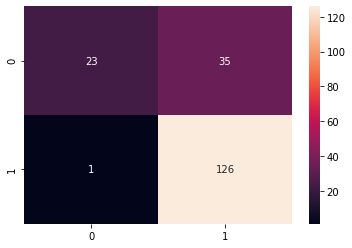

In [25]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_predict)
sns.heatmap(cm,annot=True,fmt='d')

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

         0.0       0.96      0.40      0.56        58
         1.0       0.78      0.99      0.88       127

    accuracy                           0.81       185
   macro avg       0.87      0.69      0.72       185
weighted avg       0.84      0.81      0.78       185



In [27]:
# importing 5 models to fit data
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier

# create a list
models = [
          ('LogisticRegression', LogisticRegression()), 
          ('KNN', KNeighborsClassifier()),
          ('SVC', SVC()), 
          ('RF', RandomForestClassifier()),
          ('GNB', GaussianNB()))
        ]

results = []
names = []
scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc']
for name, model in models:
        clf = model.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(name)
        print(classification_report(y_test, y_pred))

LogisticRegression
              precision    recall  f1-score   support

         0.0       0.96      0.40      0.56        58
         1.0       0.78      0.99      0.88       127

    accuracy                           0.81       185
   macro avg       0.87      0.69      0.72       185
weighted avg       0.84      0.81      0.78       185

KNN
              precision    recall  f1-score   support

         0.0       0.75      0.41      0.53        58
         1.0       0.78      0.94      0.85       127

    accuracy                           0.77       185
   macro avg       0.76      0.68      0.69       185
weighted avg       0.77      0.77      0.75       185

SVC
              precision    recall  f1-score   support

         0.0       0.96      0.40      0.56        58
         1.0       0.78      0.99      0.88       127

    accuracy                           0.81       185
   macro avg       0.87      0.69      0.72       185
weighted avg       0.84      0.81      0.78    

In [28]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor()
yhat = lof.fit_predict(X)
mask = yhat != -1
X, y = X.iloc[mask, :], y.iloc[mask]

In [29]:
pip install scikit-optimize

Note: you may need to restart the kernel to use updated packages.


In [30]:
# automatic svm hyperparameter tuning using skopt for the ionosphere dataset
from pandas import read_csv
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.model_selection import RepeatedStratifiedKFold
from skopt import BayesSearchCV
print(X.shape, y.shape)
# define search space
params = dict()
params['C'] = (1e-6, 100.0, 'log-uniform')
params['gamma'] = (1e-6, 100.0, 'log-uniform')
params['degree'] = (1,5)
params['kernel'] = ['linear', 'poly', 'rbf', 'sigmoid']
# define evaluation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# define the search
search = BayesSearchCV(estimator=SVC(), search_spaces=params, n_jobs=-1, cv=cv)
# perform the search
search.fit(X, y)
# report the best result
print(search.best_score_)
print(search.best_params_)

(511, 11) (511,)
0.8258295625942687
OrderedDict([('C', 20.89596496626363), ('degree', 3), ('gamma', 0.10111191864045106), ('kernel', 'rbf')])


In [32]:
df_test = pd.read_csv('E:/Analyticsvidhya/test.csv')

In [33]:
from pandas_profiling import ProfileReport
pf = ProfileReport(df_test)
pf.to_widgets()

Summarize dataset:   0%|          | 0/24 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

C:\Users\Suyog\anaconda3\lib\site-packages\pandas_profiling\visualisation\plot.py:166: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("RdBu"))
  cmap.set_bad(cmap_bad)


Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [34]:
df_test = df_test.fillna(df_test.mode().iloc[0])
df_test['Gender']= label_encoder.fit_transform(df_test['Gender'])
df_test['Married']= label_encoder.fit_transform(df_test['Married'])
df_test['Education']= label_encoder.fit_transform(df_test['Education'])
df_test['Credit_History']= label_encoder.fit_transform(df_test['Credit_History'])
df_test['Property_Area']= label_encoder.fit_transform(df_test['Property_Area'])
df_test['Self_Employed']= label_encoder.fit_transform(df_test['Self_Employed'])
df_test['Dependents']=label_encoder.fit_transform(df_test['Dependents'])

In [35]:
test_data = df_test.drop('Loan_ID',axis=1)

In [36]:
from sklearn.preprocessing import MinMaxScaler
trans = MinMaxScaler()
data = trans.fit_transform(test_data)

In [37]:
dataset = pd.DataFrame(data)
dataset.columns = test_data.columns
test_data = dataset

In [38]:
test_predictions = search.predict(test_data)

In [39]:
Loan_ID = df_test['Loan_ID']
submission_df_1 = pd.DataFrame({
                  "Loan_ID": Loan_ID, 
                  "Loan_Status": test_predictions})

In [40]:
submission_df_1["Loan_Status"] = submission_df_1["Loan_Status"].map(
                   {1:"Y" ,0:"N"})

In [41]:
submission_df_1.to_csv('E:/Analyticsvidhya/Loan_Predictions.csv', index=False)

C:\Users\Suyog\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


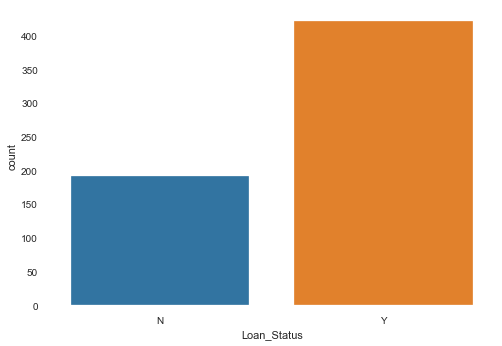

In [44]:
g = sns.countplot(df_train['Loan_Status'])
g.set_xticklabels(['N','Y'])
plt.show()

In [54]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, y_train)

svc_predict = svc_model.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))

ROCAUC score: 0.6746538148248711
Accuracy score: 0.7783783783783784
F1 score: 0.8551236749116607


In [55]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score,accuracy_score,f1_score

# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, y_train)

svc_predict = svc_model.predict(test_data)# check performance


In [56]:
Loan_ID = df_test['Loan_ID']
submission_df_1 = pd.DataFrame({
                  "Loan_ID": Loan_ID, 
                  "Loan_Status": test_predictions})

In [57]:
submission_df_1["Loan_Status"] = submission_df_1["Loan_Status"].map(
                   {1:"Y" ,0:"N"})

In [58]:
submission_df_1.to_csv('E:/Analyticsvidhya/Loan_Predictions.csv', index=False)